<h3> Import required modules

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import style
style.use('ggplot')
warnings.filterwarnings('ignore')

<h4> Read in the dataset

In [59]:
df= pd.read_csv('/Users/Brenden/Downloads/Dataset/diabetes.csv')

<h3> Display the dataset

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<h4> Check the dataset's dimensions

In [62]:
df.shape

(768, 9)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3> Data Preprocessing

In [65]:
#change columns names to lowercase
df.columns= df.columns.str.lower()

<h4> Check for missing values

In [66]:
df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

<h4> Check for duplicate values

In [67]:
df.duplicated().sum()

0

<h4> Get descriptive statistics of the dataset

In [68]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3> EDA

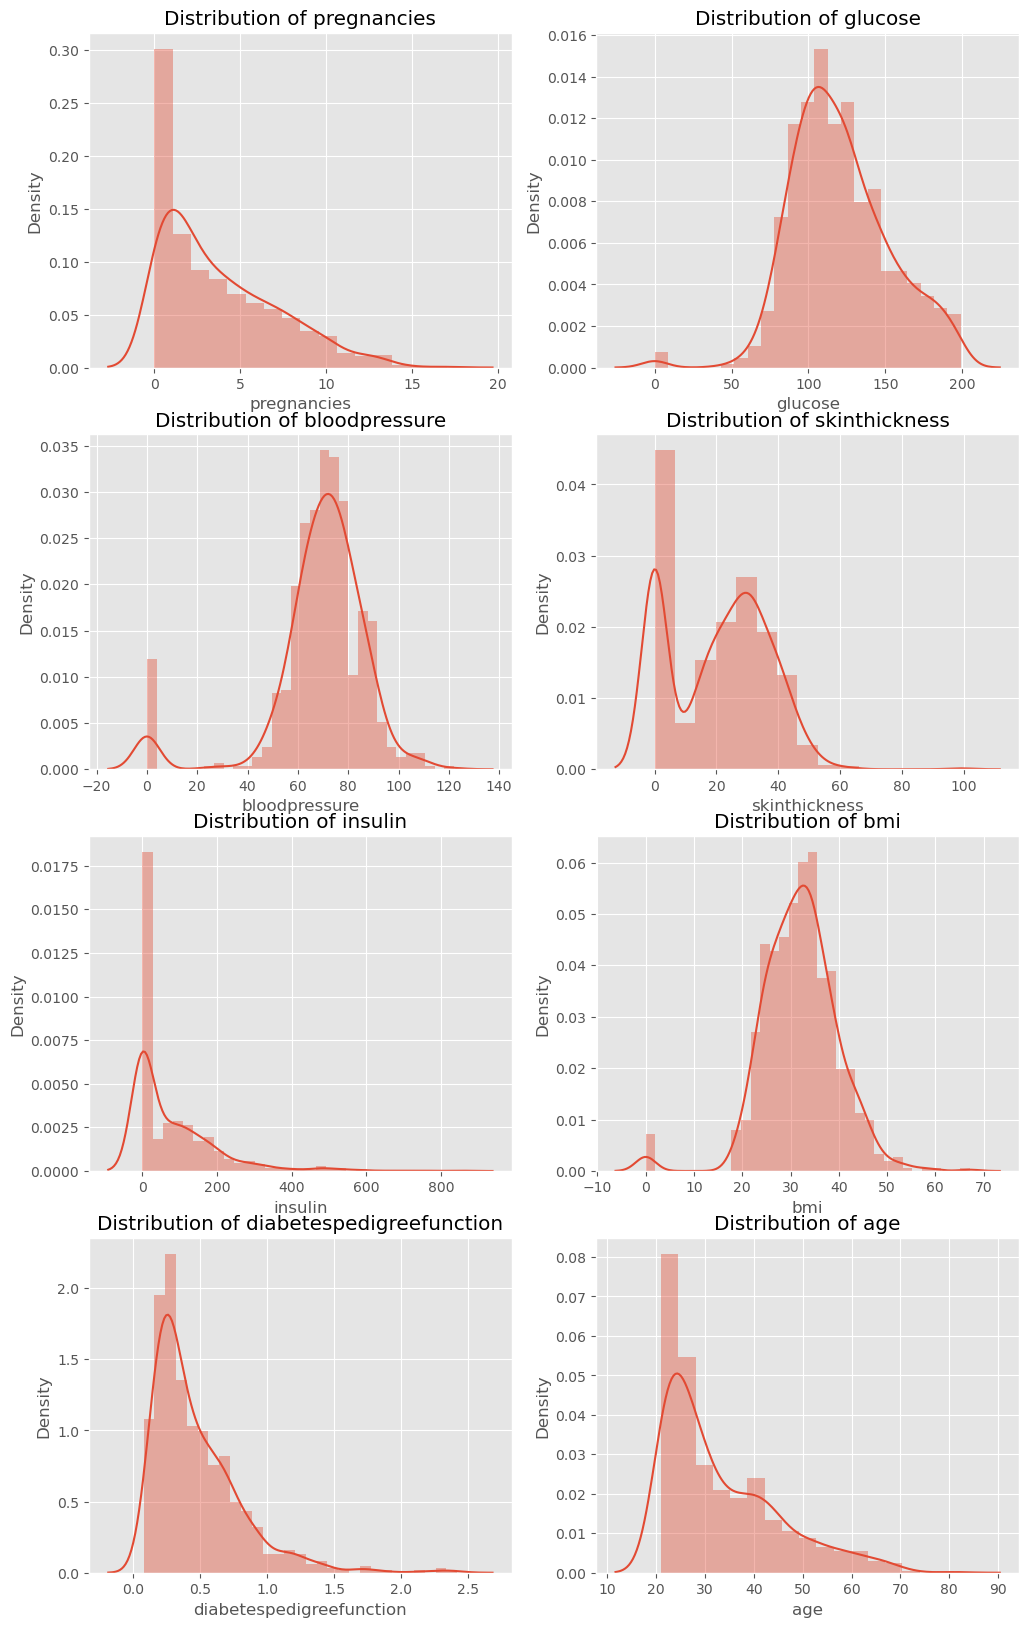

In [69]:
num= ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction','age']#numeerical values

plt.figure(figsize=(12,20))

for i,col in enumerate (num):
    plt.subplot(4,2, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

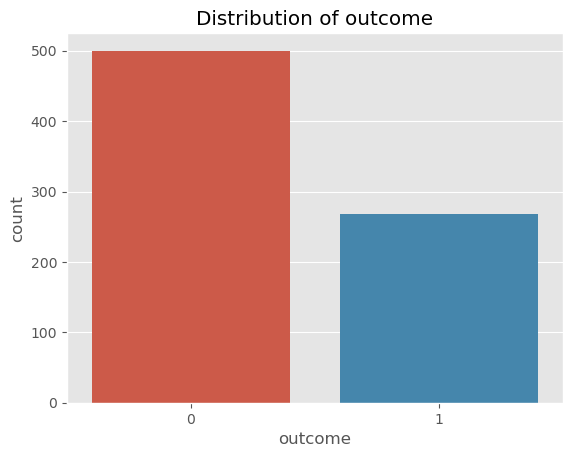

In [70]:
sns.countplot(df,x='outcome')# categorical value
plt.title('Distribution of outcome')
plt.show()

<h4> Seperate the independent variables from the target variable

In [71]:
X= df.drop('outcome',axis=1)
y= df['outcome']

<h3> Scale the data

In [72]:
from sklearn.preprocessing import RobustScaler
rob= RobustScaler()

In [73]:
X= rob.fit_transform(X)
y= rob.fit_transform(y.values.reshape(-1,1))

<h3> Split the dataset into training & testing sets

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

<h4> Train the ML models

In [75]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<h3> Random Forest

In [138]:
rf= RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_split=3,max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [139]:
y_pred= rf.predict(X_test)
acc1= accuracy_score(y_test,y_pred)
acc1

0.7489177489177489

In [157]:
knn= KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=7)

In [158]:
y_pred= knn.predict(X_test)
acc2= accuracy_score(y_test,y_pred)
acc2

0.7142857142857143

In [159]:
svm= SVC()
svm.fit(X_train,y_train)

SVC()

In [160]:
y_pred= svm.predict(X_test)
acc3= accuracy_score(y_test,y_pred)
acc3

0.7402597402597403

In [161]:
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [162]:
y_pred= log_reg.predict(X_test)
acc4= accuracy_score(y_test,y_pred)
acc4

0.7359307359307359

In [187]:
gb= GradientBoostingClassifier(n_estimators=50,max_depth=5,min_samples_split=5,max_features='sqrt')
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=5, n_estimators=50)

In [188]:
y_pred= gb.predict(X_test)
acc5= accuracy_score(y_test,y_pred)
acc5

0.7402597402597403

<h3> Model Performance

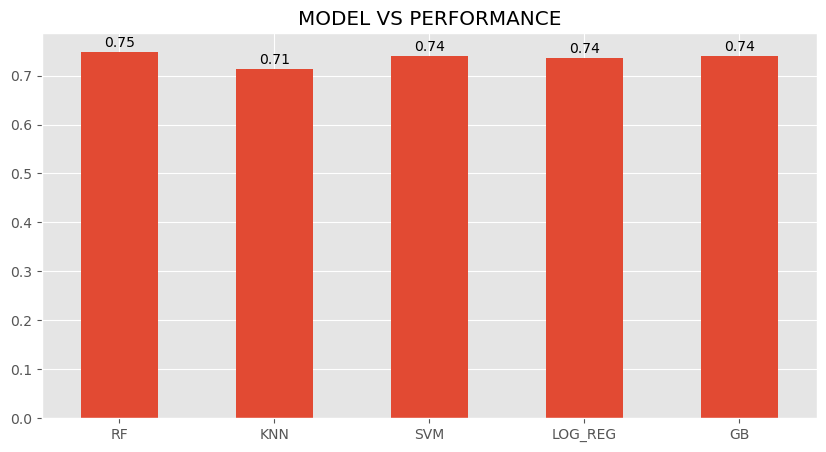

In [190]:
score= pd.Series([acc1,acc2,acc3,acc4,acc5],['RF','KNN','SVM','LOG_REG','GB'])
score.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=0,ha='center')
plt.title('MODEL VS PERFORMANCE')
for i,v in enumerate(score):
    plt.text(i,v +0.01, str(round(v,2)),ha='center')

plt.show()

In [191]:
import pickle
pickle.dump(rf,open('./diabetes_model','wb'))